In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Load dataset
df = pd.read_csv('Dataset\Customer Churn.csv')  # Replace with your dataset file

# General overview
print("Dataset Overview:")
print(df.info())
print("\nMissing Values Count:\n", df.isnull().sum())

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe(include='all'))

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: flo

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
df.iloc[:, :] = imputer.fit_transform(df)

In [ ]:
# Convert target variable (Churn) to integer if not already
df['Churn'] = df['Churn'].astype(int)

# 1. Basic EDA
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.0

C:\Users\rishe\AppData\Local\Temp\ipykernel_38676\3620798599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


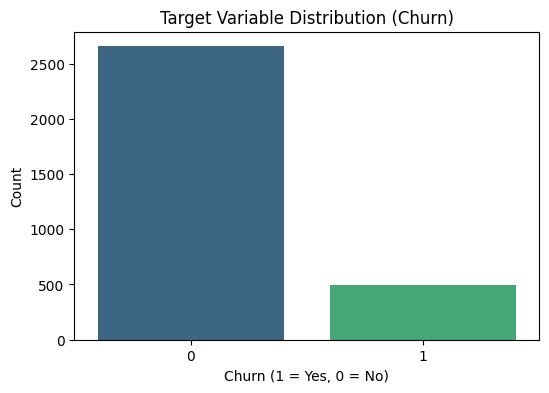

In [ ]:
# Visualizing target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title("Target Variable Distribution (Churn)")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

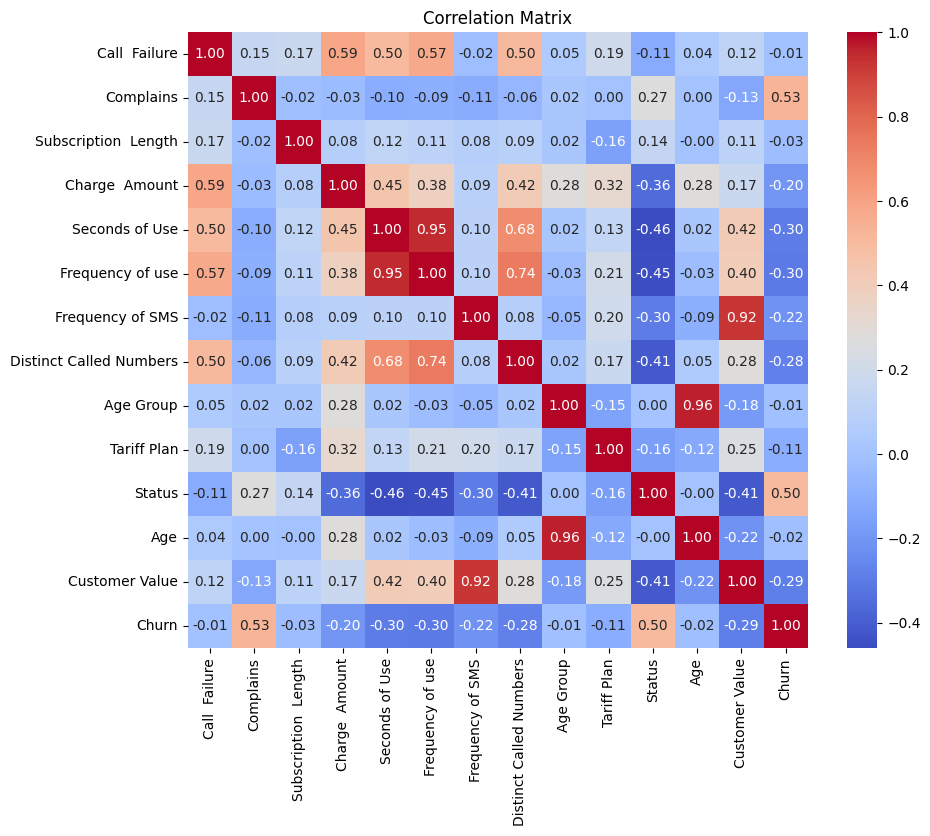

In [ ]:
# 2. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 7. High-Risk Customer Analysis
threshold_call_failure = df['Call  Failure'].mean()
high_risk_customers = df[(df['Call  Failure'] > threshold_call_failure) & (df['Complains'] == 1)]
print(f"\nHigh-Risk Customers Count: {len(high_risk_customers)}")
print(f"High-Risk Churn Rate: {high_risk_customers['Churn'].mean() * 100:.2f}%")

# 8. Export Results for Further Reporting
feature_importances.to_csv("feature_importances.csv", index=False)
high_risk_customers.to_csv("high_risk_customers.csv", index=False)


High-Risk Customers Count: 145
High-Risk Churn Rate: 75.17%


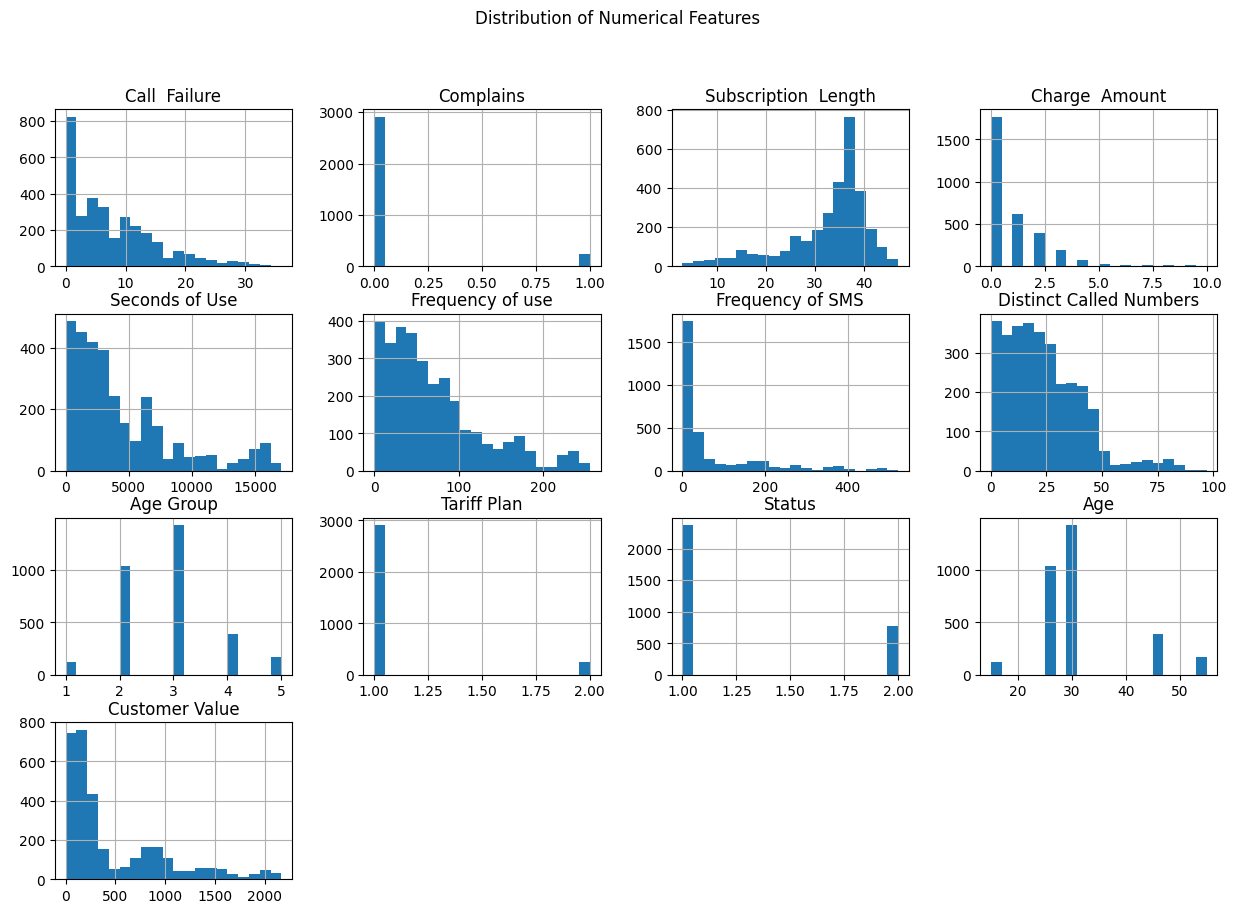

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 1. **Distribution of Features**

# Distribution of numerical variables
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Distribution of categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(10, 6))
for col in categorical_features:
    plt.subplot(2, 3, categorical_features.get_loc(col) + 1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

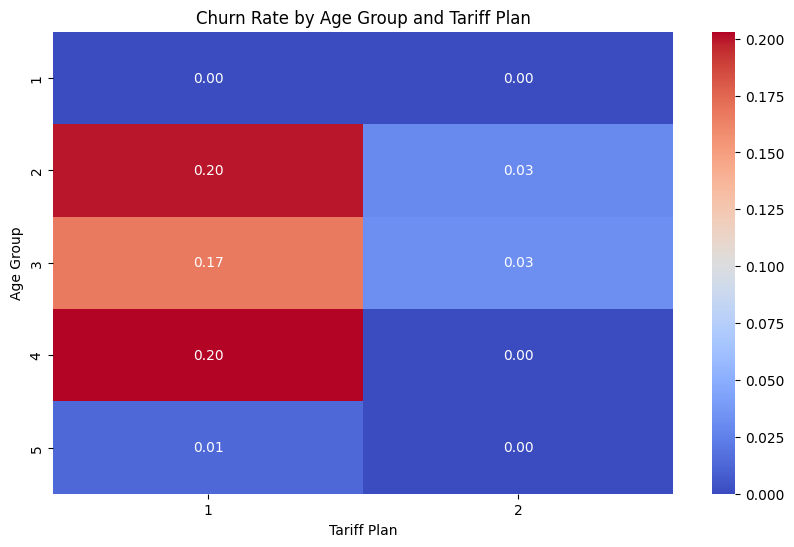


--- Chi-Squared Test (Tariff Plan vs Churn) ---
Chi-Squared Stat: 34.21761003954184, P-value: 4.928097701198338e-09

--- ANOVA Test (Age Group vs Churn) ---
F-statistic: 14.996245168285425, P-value: 3.805460464570242e-12


In [ ]:
# Grouping Churn by multiple categorical features
grouped_churn = df.groupby(['Age Group', 'Tariff Plan'])['Churn'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_churn, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Churn Rate by Age Group and Tariff Plan")
plt.show()

# Hypothesis Testing: Check if Churn varies by Tariff Plan
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Tariff Plan'], df['Churn'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"\n--- Chi-Squared Test (Tariff Plan vs Churn) ---")
print(f"Chi-Squared Stat: {chi2_stat}, P-value: {p_val}")

# Hypothesis Testing: Compare Churn by Age Group using ANOVA
from scipy.stats import f_oneway
age_group_churn = [df[df['Age Group'] == age]['Churn'] for age in df['Age Group'].unique()]
anova_stat, p_value = f_oneway(*age_group_churn)
print(f"\n--- ANOVA Test (Age Group vs Churn) ---")
print(f"F-statistic: {anova_stat}, P-value: {p_value}")



Summary Statistics for Call  Failure:
count    3150.000000
mean        7.627937
std         7.263886
min         0.000000
25%         1.000000
50%         6.000000
75%        12.000000
max        36.000000
Name: Call  Failure, dtype: float64


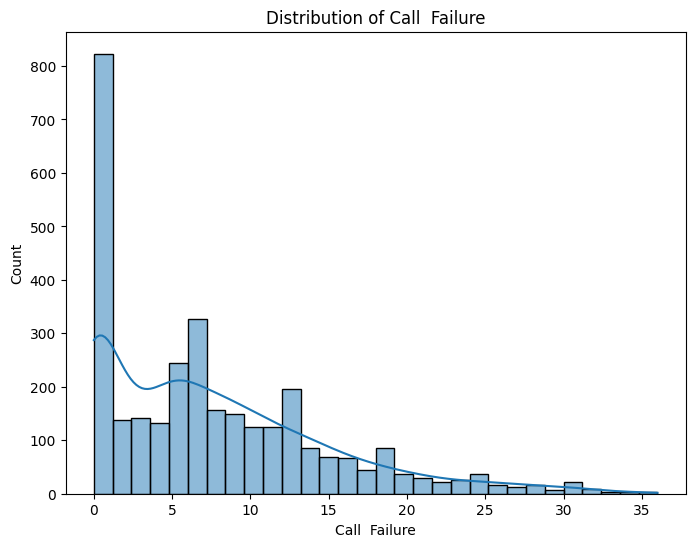


Summary Statistics for Complains:
count    3150.000000
mean        0.076508
std         0.265851
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complains, dtype: float64


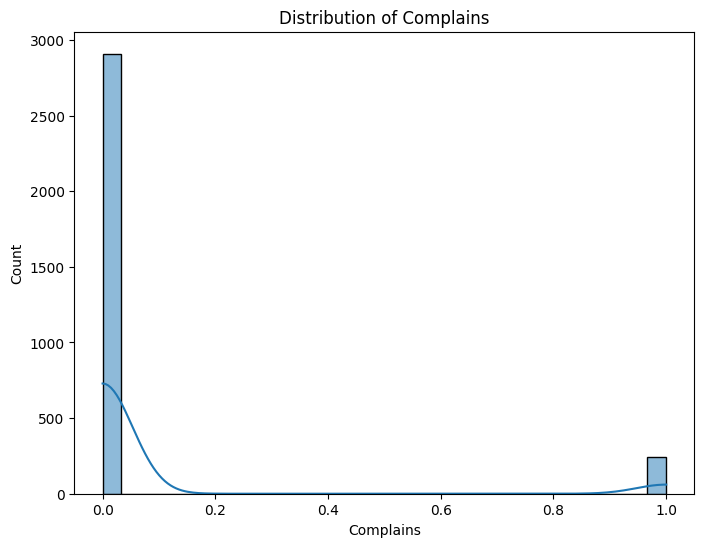


Summary Statistics for Subscription  Length:
count    3150.000000
mean       32.541905
std         8.573482
min         3.000000
25%        30.000000
50%        35.000000
75%        38.000000
max        47.000000
Name: Subscription  Length, dtype: float64


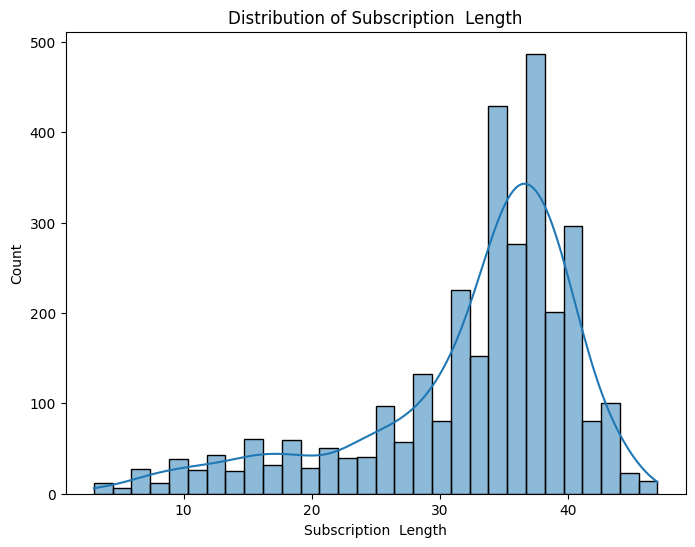


Summary Statistics for Charge  Amount:
count    3150.000000
mean        0.942857
std         1.521072
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Charge  Amount, dtype: float64


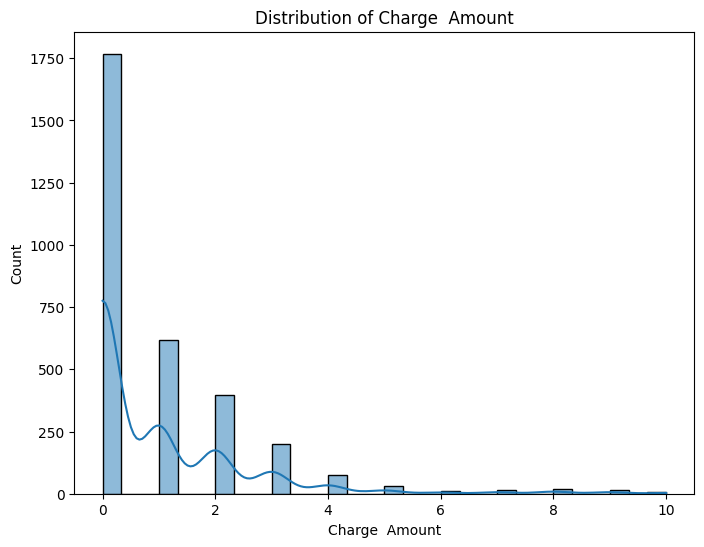


Summary Statistics for Seconds of Use:
count     3150.000000
mean      4472.459683
std       4197.908687
min          0.000000
25%       1391.250000
50%       2990.000000
75%       6478.250000
max      17090.000000
Name: Seconds of Use, dtype: float64


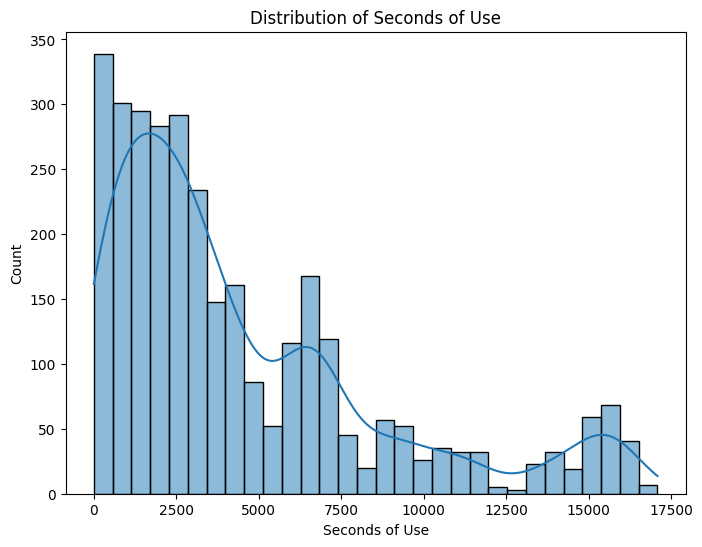


Summary Statistics for Frequency of use:
count    3150.000000
mean       69.460635
std        57.413308
min         0.000000
25%        27.000000
50%        54.000000
75%        95.000000
max       255.000000
Name: Frequency of use, dtype: float64


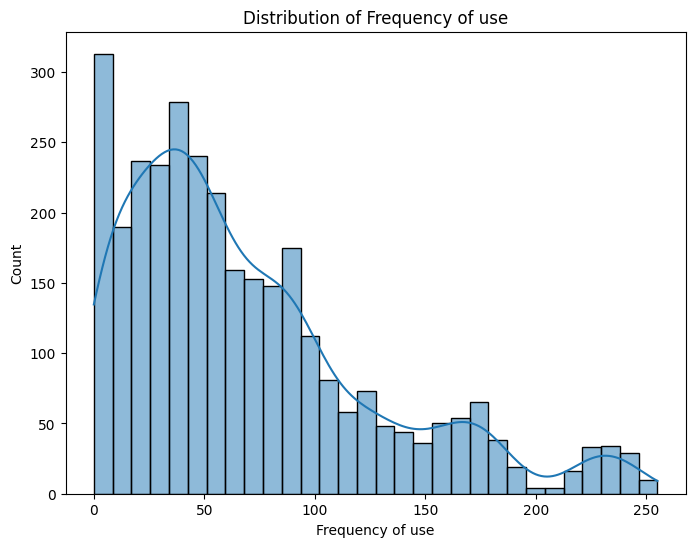


Summary Statistics for Frequency of SMS:
count    3150.000000
mean       73.174921
std       112.237560
min         0.000000
25%         6.000000
50%        21.000000
75%        87.000000
max       522.000000
Name: Frequency of SMS, dtype: float64


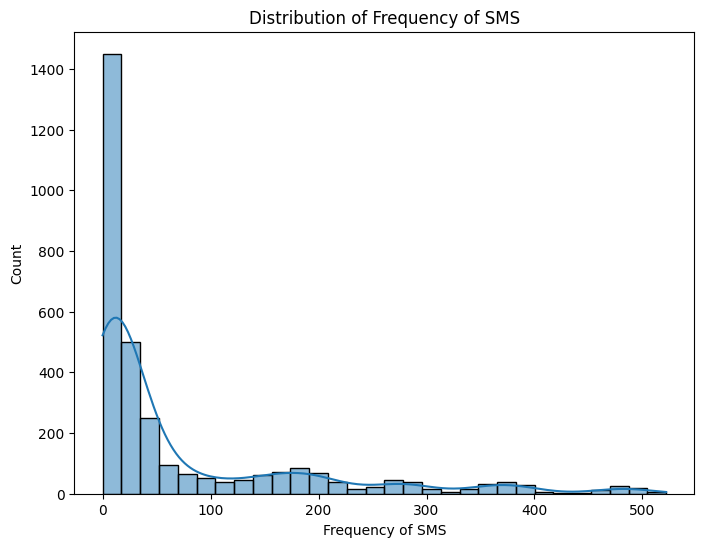


Summary Statistics for Distinct Called Numbers:
count    3150.000000
mean       23.509841
std        17.217337
min         0.000000
25%        10.000000
50%        21.000000
75%        34.000000
max        97.000000
Name: Distinct Called Numbers, dtype: float64


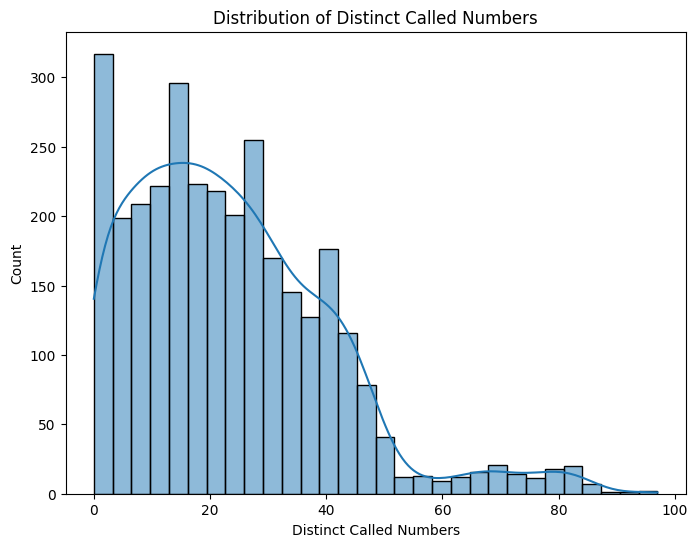


Summary Statistics for Age Group:
count    3150.000000
mean        2.826032
std         0.892555
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Age Group, dtype: float64


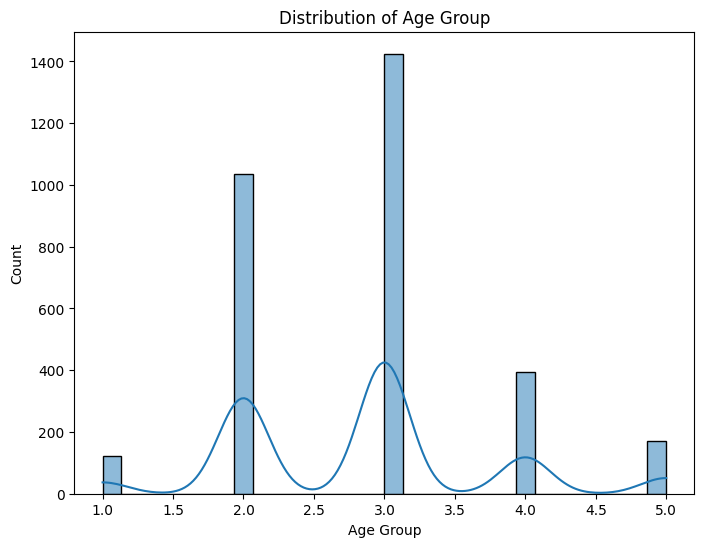


Summary Statistics for Tariff Plan:
count    3150.000000
mean        1.077778
std         0.267864
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Tariff Plan, dtype: float64


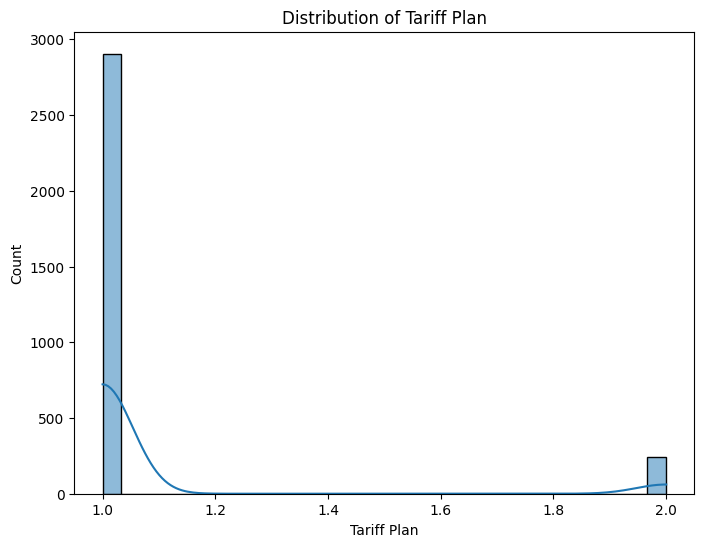


Summary Statistics for Status:
count    3150.000000
mean        1.248254
std         0.432069
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Status, dtype: float64


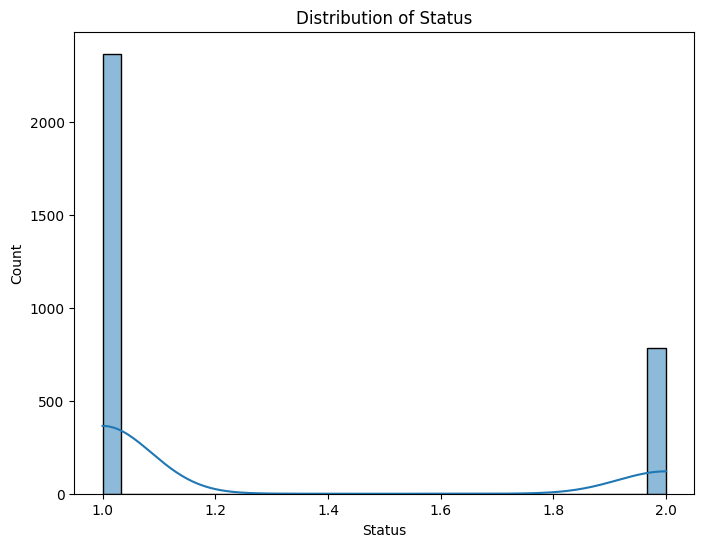


Summary Statistics for Age:
count    3150.000000
mean       30.998413
std         8.831095
min        15.000000
25%        25.000000
50%        30.000000
75%        30.000000
max        55.000000
Name: Age, dtype: float64


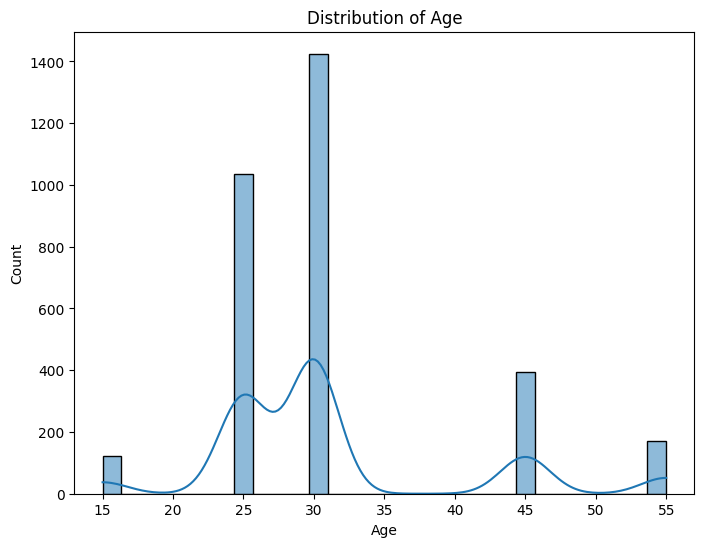


Summary Statistics for Customer Value:
count    3150.000000
mean      470.972916
std       517.015433
min         0.000000
25%       113.801250
50%       228.480000
75%       788.388750
max      2165.280000
Name: Customer Value, dtype: float64


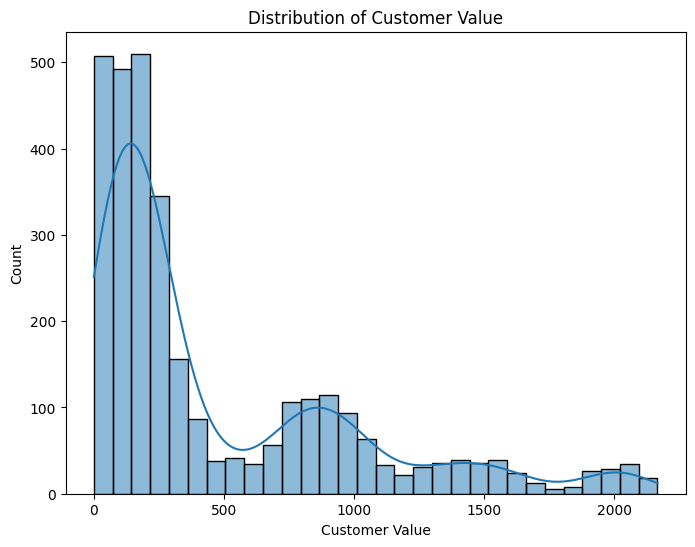

In [ ]:
# Step 4: Numerical Feature Exploration
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    print(f"\nSummary Statistics for {col}:")
    print(df[col].describe())
    # Plot distributions
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

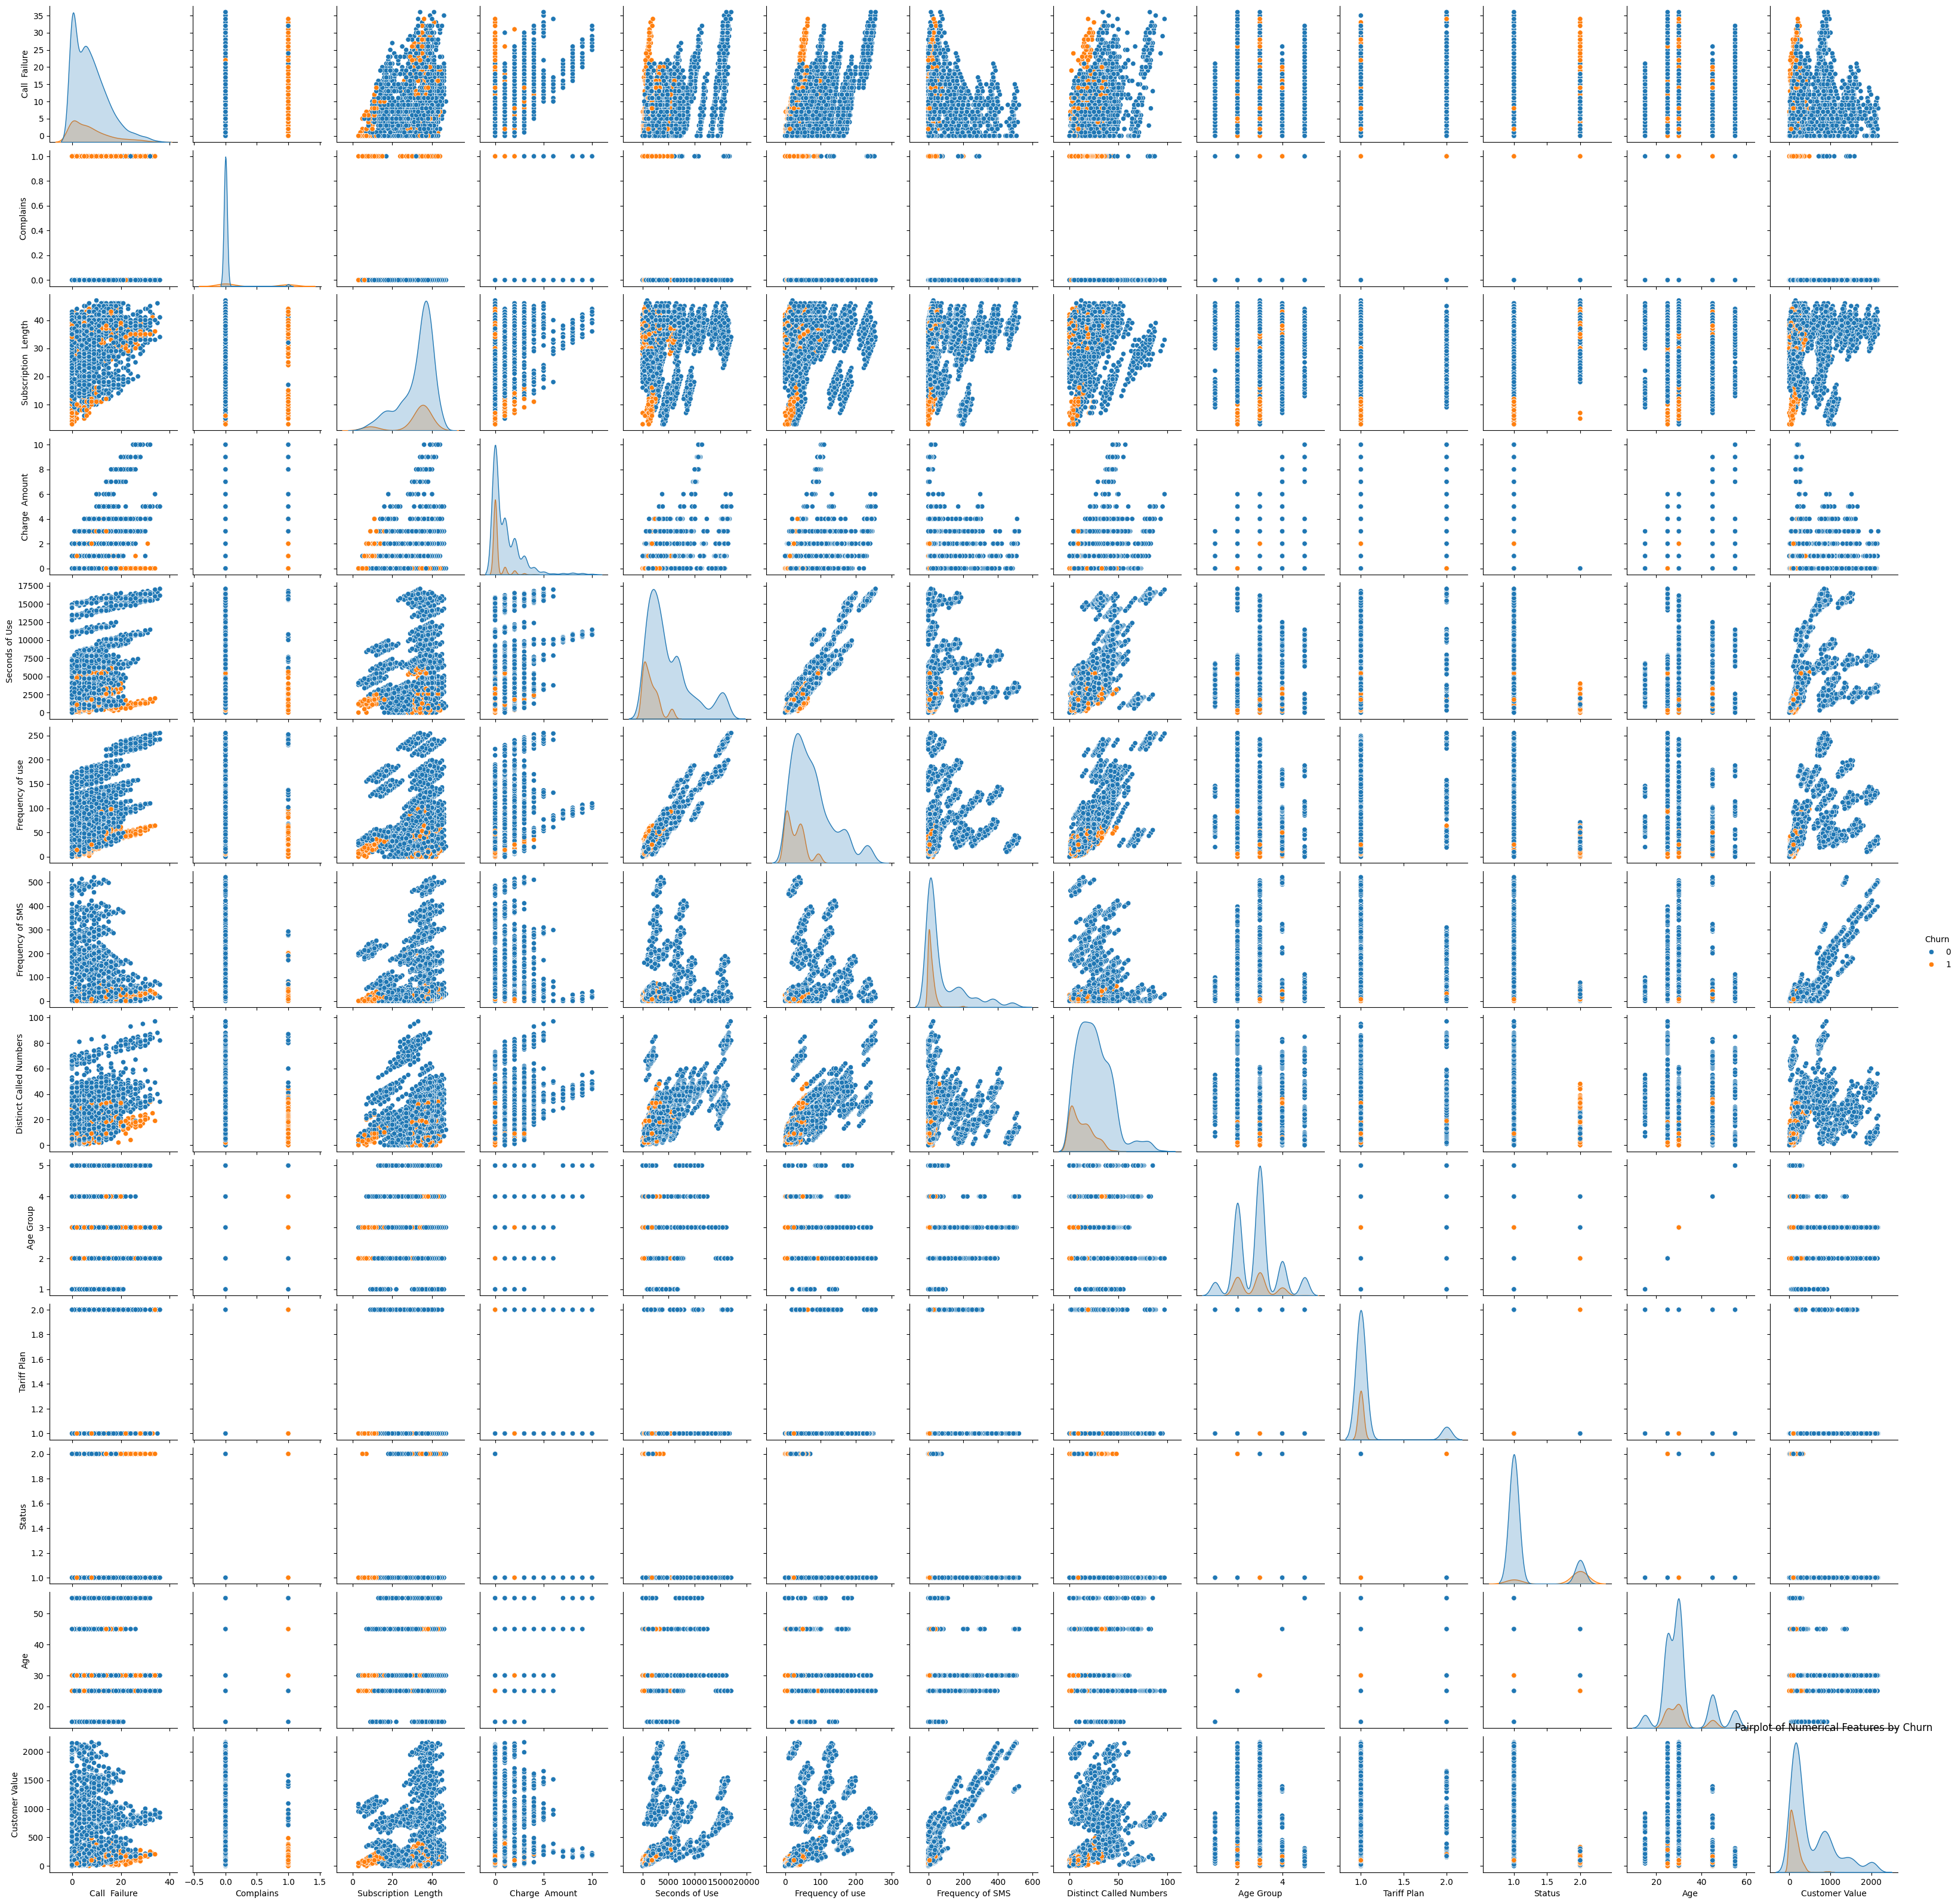

In [ ]:
# Step 11: Multivariate Analysis
# Analyze interactions between multiple features
sns.pairplot(df[numerical_columns].join(y), hue="Churn")
plt.title("Pairplot of Numerical Features by Churn")
plt.show()